<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/California_Housing-_Prices_Prediction/blob/main/California_Housing__Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importing the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Reading the housing.csv file into a pandas DataFrame and displaying the first 5 rows
df=pd.read_csv("/content/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
# Printing the information about the DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
# Dropping rows with missing values in the 'total_bedrooms' column
df.dropna(subset=['total_bedrooms'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [36]:
# Importing the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [37]:
# Splitting the DataFrame into X (features) and Y (target variable)
# X is obtained by dropping the 'median_house_value' column from the DataFrame using the drop() method with axis=1
# Y is assigned the 'median_house_value' column from the DataFrame
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']

In [38]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [39]:
# Creating the train_data DataFrame by joining X_train (features) and Y_train (target variable)
# The join() method is used to combine the two DataFrames along the columns
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

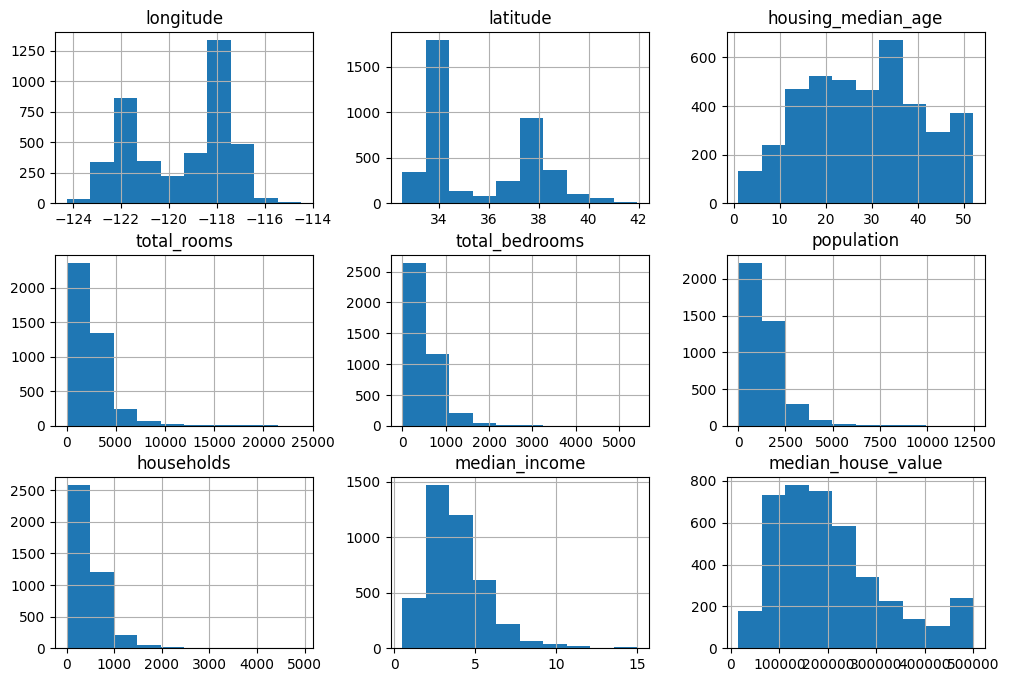

In [40]:
# Creating a histogram of the columns in the train_data DataFrame
# The figsize parameter is set to (12, 8) to adjust the size of the figure
train_data.hist(figsize=(12,8))

<ipython-input-41-8b4eefd8225c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

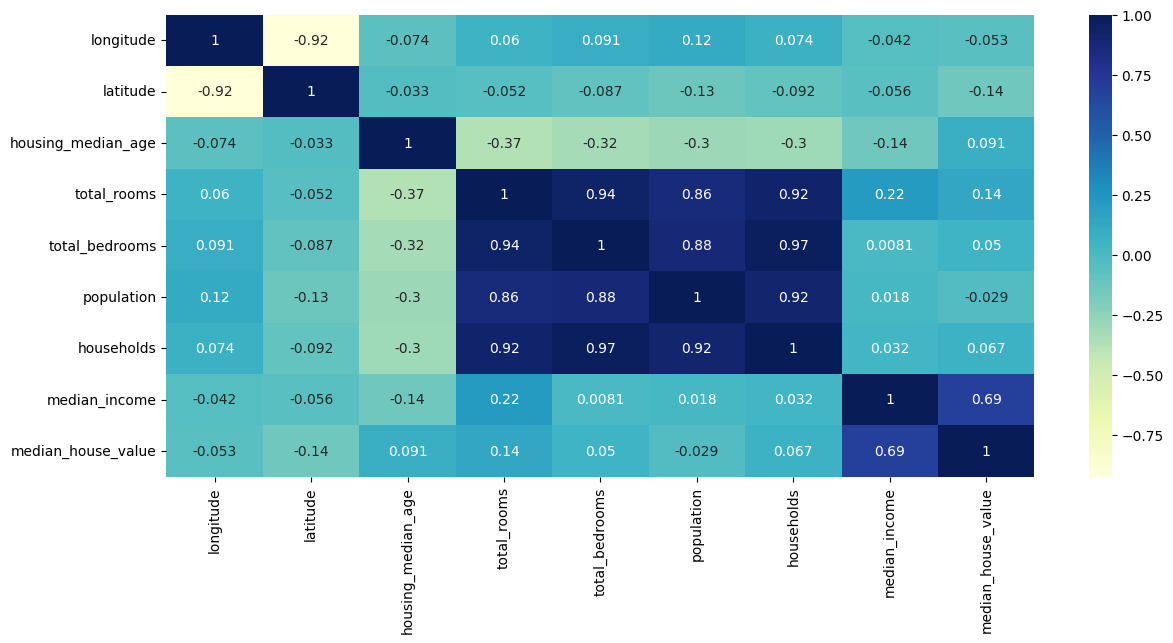

In [41]:
# Creating a heatmap of the correlation matrix of the train_data DataFrame
plt.figure(figsize=(14,6))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [42]:
# Applying the natural logarithm transformation to specific columns in the train_data DataFrame
# The 'total_rooms', 'total_bedrooms', 'population', and 'households' columns are transformed
# The transformation is performed using np.log() function with the column values incremented by 1 to handle zero values
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

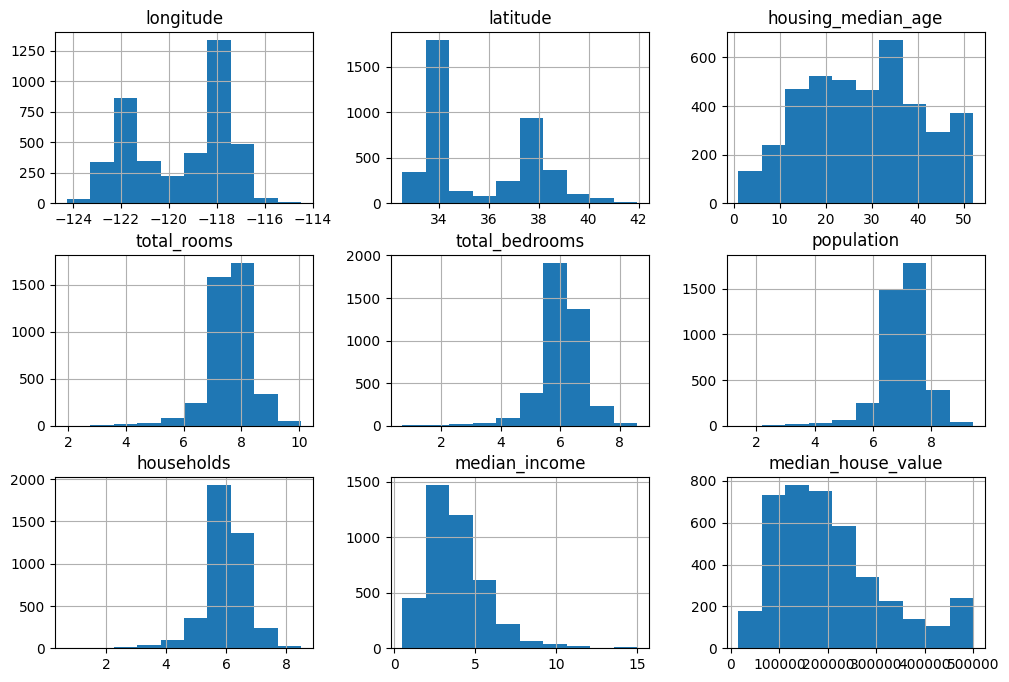

In [43]:
train_data.hist(figsize=(12,8))

In [44]:
# Counting the occurrences of each category in the 'ocean_proximity' column of the train_data DataFrame
train_data.ocean_proximity.value_counts()

<1H OCEAN     1793
INLAND        1332
NEAR OCEAN     509
NEAR BAY       450
ISLAND           2
Name: ocean_proximity, dtype: int64

In [45]:
# Encoding the 'ocean_proximity' column of the train_data DataFrame using one-hot encoding
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10964,-117.88,33.78,26.0,8.052615,6.508769,7.360740,6.586172,3.3472,237400.0,1,0,0,0,0
12545,-121.50,38.55,49.0,8.317522,6.453625,7.218177,6.492240,5.2362,236800.0,0,1,0,0,0
18596,-122.09,37.07,33.0,8.183677,6.599870,7.484930,6.498282,4.3429,214300.0,0,0,0,0,1
16219,-121.34,37.96,23.0,7.948385,6.492240,7.349231,6.484635,3.0354,113700.0,0,1,0,0,0
3137,-117.65,35.00,36.0,7.077498,5.758902,6.511745,5.488938,1.9107,39800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

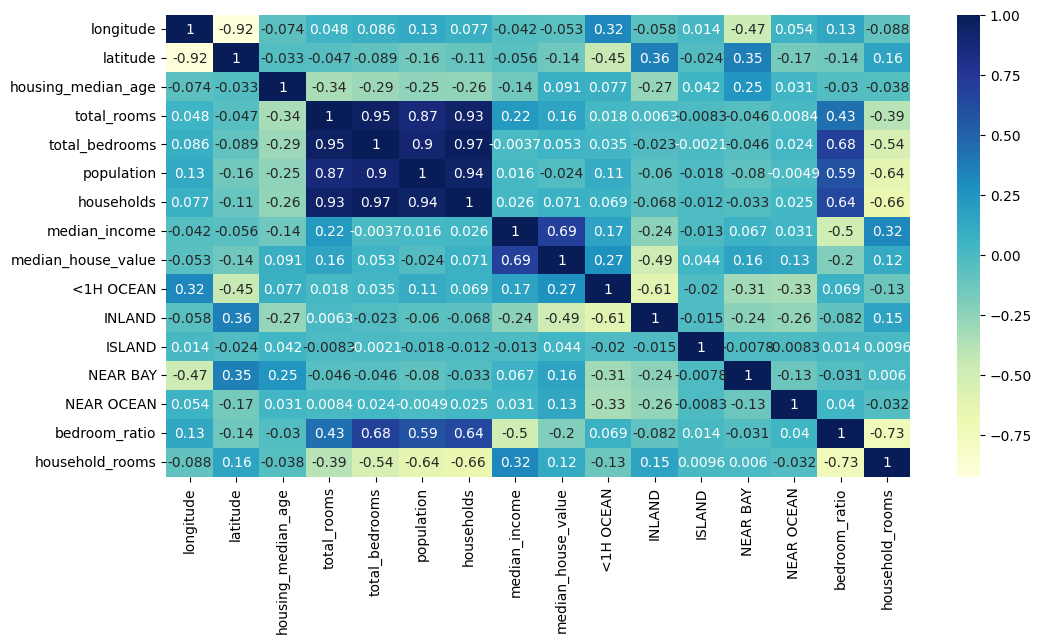

In [54]:
# Creating a heatmap of the correlation matrix of the train_data DataFrame
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

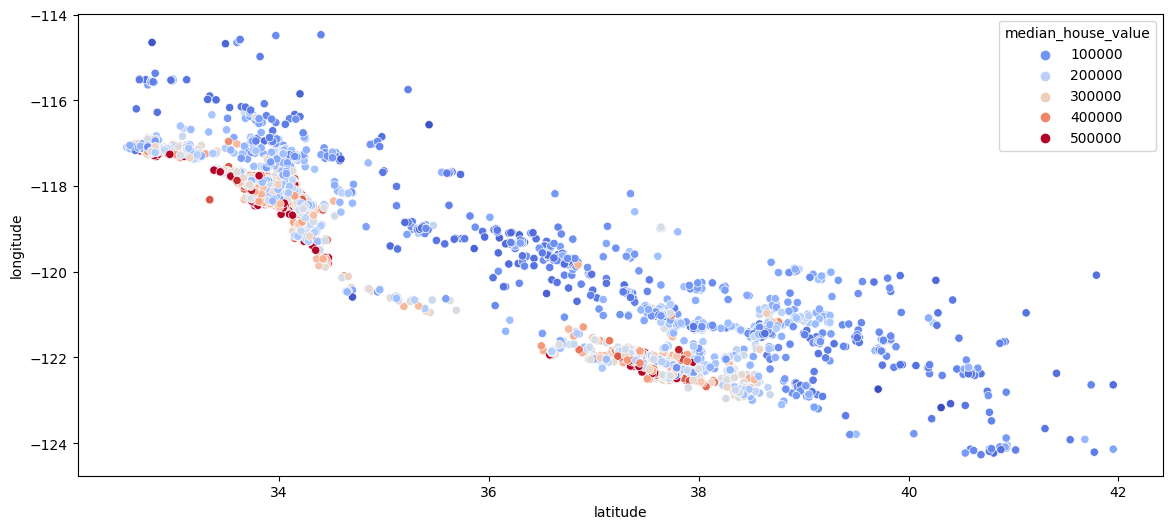

In [51]:
# Creating a scatter plot of latitude versus longitude from the train_data DataFrame
plt.figure(figsize=(14,6))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

In [52]:
# Creating two new columns in the train_data DataFrame
# The 'bedroom_ratio' column is calculated by dividing 'total_bedrooms' by 'total_rooms'
# The 'household_rooms' column is calculated by dividing 'total_rooms' by 'households'
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

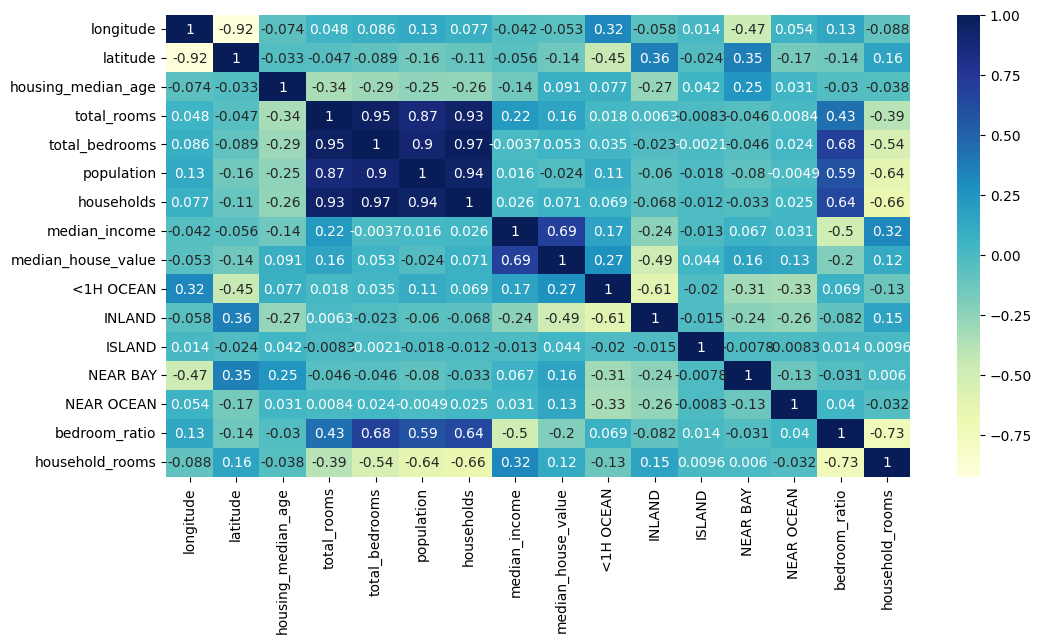

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [56]:
# Importing the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
t_data = X_test.join(Y_test)

t_data['total_rooms'] = np.log(t_data['total_rooms'] + 1)
t_data['total_bedrooms'] = np.log(t_data['total_bedrooms'] + 1)
t_data['population'] = np.log(t_data['population'] + 1)
t_data['households'] = np.log(t_data['households'] + 1)

t_data = t_data.join(pd.get_dummies(t_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

t_data['bedroom_ratio'] = t_data['total_bedrooms'] / t_data['total_rooms']
t_data['household_rooms'] = t_data['total_rooms'] / t_data['households']

# Creating a new DataFrame called 't_data' by joining X_test and y_test
# Applying logarithmic transformation to the 'total_rooms', 'total_bedrooms', 'population', and 'households' columns in t_data
# Encoding the 'ocean_proximity' column of t_data using one-hot encoding
# Dropping the original 'ocean_proximity' column from t_data
# Creating two new columns in t_data: 'bedroom_ratio' calculated as 'total_bedrooms' divided by 'total_rooms', and 'household_rooms' calculated as 'total_rooms' divided by 'households'


In [59]:
X_test, y_test = t_data.drop(['median_house_value'], axis=1), t_data['median_house_value']

# Splitting the t_data DataFrame into X_test and y_test
# X_test contains all the columns except 'median_house_value'
# y_test contains only the 'median_house_value' column


In [60]:
reg.score(X_train, y_train)
# Calculating the coefficient of determination (R-squared) for the linear regression model
# The score() method is called on the 'reg' linear regression model object
# It takes X_train and y_train as input to evaluate the model's performance on the training data


0.6784573797755192

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Importing the RandomForestRegressor class from the sklearn.ensemble module
# Creating an instance of the RandomForestRegressor class called 'forest'
# Fitting the random forest regression model using the fit() method with X_train and y_train as input


RandomForestRegressor()

In [62]:
forest.score(X_train, y_train)

# Calculating the coefficient of determination (R-squared) for the random forest regression model
# The score() method is called on the 'forest' random forest regression model object
# It takes X_train and y_train as input to evaluate the model's performance on the training data


0.9671134182792022

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(
    forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True
)
grid_search.fit(X_train, y_train)

# Importing the GridSearchCV class from the sklearn.model_selection module
# Importing the RandomForestRegressor class from the sklearn.ensemble module
# Creating an instance of the RandomForestRegressor class called 'forest'
# Defining the parameter grid for the grid search
# The parameter grid contains different values for 'n_estimators' and 'max_features'
# Creating an instance of GridSearchCV called 'grid_search'
# The grid search is performed on the 'forest' random forest regression model using the specified parameter grid
# The grid search uses 5-fold cross-validation, scoring is based on negative mean squared error, and it returns train scores as well
# The fit() method is called on the grid search object with X_train and y_train as input to search for the best hyperparameters


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
best_forest = grid_search.best_estimator_

# Assigning the best estimator found by the grid search to the variable 'best_forest'
# The best estimator is obtained from the 'grid_search' object using the best_estimator_ attribute


In [65]:
best_forest.score(X_train, y_train)

# Calculating the coefficient of determination (R-squared) for the best random forest regression model
# The score() method is called on the 'best_forest' random forest regression model object
# It takes X_train and y_train as input to evaluate the model's performance on the training data


0.9624556377113277

Conclusion:
The best random forest regression model achieved a high R-squared value of approximately 0.962, indicating that the model explains about 96.2% of the variance in the target variable (median house value) using the provided features (independent variables). This suggests that the model has a strong ability to capture the underlying patterns and relationships in the training data.